# Primer Github
[GitHub](https://github.com/dmishin/tsp-solver)


In [ ]:
import tsplib95

# Carga el problema desde un archivo
problem = tsplib95.load('berlin52.tsp')

# Accede a los nodos
nodos = list(problem.get_nodes())
print(nodos)

# Accede a la distancia entre nodos
distancia = problem.get_weight(1, 2)
print(distancia)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
666


In [6]:
from tsp_solver.greedy import solve_tsp
import tsplib95
import numpy as np
import time

# Carga el problema desde el archivo TSPLIB
try:
    problem = tsplib95.load('berlin52.tsp')
except FileNotFoundError:
    print("Error: El archivo TSPLIB no fue encontrado.")
    exit()

# Obtiene la lista de nodos
nodos = list(problem.get_nodes())
num_nodos = len(nodos)

# Crea una matriz de distancias vacía
dist_matrix = np.zeros((num_nodos, num_nodos))

# Llena la matriz de distancias usando la información del problema TSPLIB
for i in range(num_nodos):
    for j in range(i + 1, num_nodos):
        u = nodos[i]
        v = nodos[j]
        distance = problem.get_weight(u, v)
        dist_matrix[i, j] = distance
        dist_matrix[j, i] = distance  # La distancia es simétrica

# Marca el tiempo de inicio justo antes de la parte que quieres medir
start_time = time.time()

# Resuelve el TSP usando la matriz de distancias
path = solve_tsp(dist_matrix)

# Marca el tiempo de finalización justo después de la parte que quieres medir
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time

# Imprime el tiempo de ejecución
print(f"La resolución del TSP tomó {execution_time:.4f} segundos.")


# Imprime la ruta resultante (los índices corresponden al orden en la lista de nodos)
print(path)

# Si quieres los nombres originales de los nodos en la ruta:
nombres_ruta = [nodos[i] for i in path]
print(nombres_ruta)

# Opcional: Calcula la longitud total de la ruta
total_distance = 0
for i in range(len(path) - 1):
    u_index = path[i]
    v_index = path[i + 1]
    total_distance += dist_matrix[u_index, v_index]
# Agrega la distancia de vuelta al inicio para un ciclo completo si es necesario
# total_distance += dist_matrix[path[-1], path[0]]
print(f"Longitud total de la ruta: {total_distance}")

La resolución del TSP tomó 0.0064 segundos.
[1, 6, 41, 20, 16, 2, 40, 8, 9, 7, 18, 44, 31, 48, 0, 21, 30, 17, 22, 29, 28, 19, 49, 15, 45, 43, 33, 34, 35, 38, 36, 39, 37, 47, 23, 4, 14, 5, 3, 24, 42, 32, 10, 50, 11, 27, 26, 25, 46, 13, 12, 51]
[2, 7, 42, 21, 17, 3, 41, 9, 10, 8, 19, 45, 32, 49, 1, 22, 31, 18, 23, 30, 29, 20, 50, 16, 46, 44, 34, 35, 36, 39, 37, 40, 38, 48, 24, 5, 15, 6, 4, 25, 43, 33, 11, 51, 12, 28, 27, 26, 47, 14, 13, 52]
Longitud total de la ruta: 7640.0


# Segundo Github

http://github.com/chenmingxiang110/tsp_solver

1 0.1 %: 20985.156714227644
2 0.2 %: 9492.017685800736
3 0.3 %: 8867.723867483788
4 0.4 %: 8729.936161458636
5 0.5 %: 8006.68537619542
6 0.6 %: 7909.297834105791
7 0.7 %: 7909.297834105791
8 0.8 %: 7909.297834105791
9 0.9 %: 7821.376780308353
10 1.0 %: 7821.376780308353
11 1.1 %: 7821.376780308353
12 1.2 %: 7821.376780308353
13 1.3 %: 7821.376780308353
14 1.4 %: 7821.376780308353
15 1.5 %: 7821.376780308353
16 1.6 %: 7821.376780308353
17 1.7 %: 7821.376780308353
18 1.8 %: 7821.376780308353
19 1.9 %: 7821.376780308353
20 2.0 %: 7807.014503362429
21 2.1 %: 7807.014503362429
22 2.2 %: 7807.014503362429
23 2.3 %: 7807.014503362429
24 2.4 %: 7677.779992486072
25 2.5 %: 7677.779992486072
26 2.6 %: 7390.760338878649
27 2.7 %: 7390.760338878649
28 2.8 %: 7390.760338878649
29 2.9 %: 7390.760338878649
30 3.0 %: 7390.760338878649
31 3.1 %: 7390.760338878649
32 3.2 %: 7390.760338878649
33 3.3 %: 7390.760338878649
34 3.4 %: 7390.760338878649
35 3.5 %: 7390.760338878649
36 3.6 %: 7390.760338878649
3

IndexError: index 50 is out of bounds for axis 0 with size 50

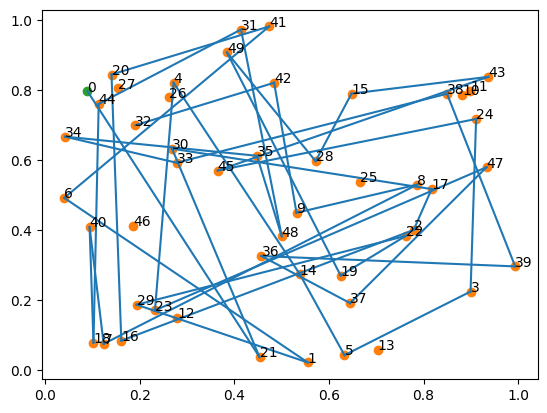

In [ ]:
import numpy as np
from iter_solver import calculate_distance_matrix, auto_solver, plot_route

# Randomize 50 points for testing
coords = []
for _ in range(50):
    coords.append(np.random.random(2))
coords = np.array(coords)

# Calculate the distance matrix
# distance_matrix = calculate_distance_matrix(coords)

# Solve the TSP problem with ruin & recreate method
d, r = auto_solver(dist_matrix, n_iter=1000, local_search_iter=100,
                   init_route=None, back_to_origin=False, verbose_step=1)
print(d)
print(r)
plot_route(coords, r)# da error por las coordenadas que no las e implementado

# Tercer Github
https://github.com/mostafabahri/tsp-solver

In [14]:
'''
Travelling Sales Person problem
Branch and bound algorithm

gitHub@MostafaBahri
gitLab@Mostafa_c6
'''
from utility import Node, PriorityQueue

start = time.time()
def travel(adj_mat, src=0):
    optimal_tour = []
    n = len(adj_mat)
    if not n:
        raise ValueError("Invalid adj Matrix")
    u = Node()
    PQ = PriorityQueue()
    optimal_length = 0
    v = Node(level=0, path=[0])
    min_length = float('inf')  # infinity
    v.bound = bound(adj_mat, v)
    PQ.put(v)
    while not PQ.empty():
        v = PQ.get()
        if v.bound < min_length:
            u.level = v.level + 1
            for i in filter(lambda x: x not in v.path, range(1, n)):
                u.path = v.path[:]
                u.path.append(i)
                if u.level == n - 2:
                    l = set(range(1, n)) - set(u.path)
                    u.path.append(list(l)[0])
                    # putting the first vertex at last
                    u.path.append(0)

                    _len = length(adj_mat, u)
                    if _len < min_length:
                        min_length = _len
                        optimal_length = _len
                        optimal_tour = u.path[:]

                else:
                    u.bound = bound(adj_mat, u)
                    if u.bound < min_length:
                        PQ.put(u)
                # make a new node at each iteration!
                u = Node(level=u.level)

    # shifting to proper source(start of path)
    optimal_tour_src = optimal_tour
    if src != 1:  # Cambiado 'is not' por '!='
        optimal_tour_src = optimal_tour[:-1]
        y = optimal_tour_src.index(src)
        optimal_tour_src = optimal_tour_src[y:] + optimal_tour_src[:y]
        optimal_tour_src.append(optimal_tour_src[0])

    return optimal_tour_src, optimal_length


def length(adj_mat, node):
    tour = node.path
    # returns the sum of two consecutive elements of tour in adj[i][j]
    return sum([adj_mat[tour[i]][tour[i + 1]] for i in range(len(tour) - 1)])  # Cambiado xrange por range


def bound(adj_mat, node):
    path = node.path
    _bound = 0

    n = len(adj_mat)
    determined, last = path[:-1], path[-1]
    # remain is index based
    remain = list(filter(lambda x: x not in path, range(n)))  # Añadido list() para Python 3

    # for the edges that are certain
    for i in range(len(path) - 1):  # Cambiado xrange por range
        _bound += adj_mat[path[i]][path[i + 1]]

    # for the last item
    _bound += min([adj_mat[last][i] for i in remain])

    p = [path[0]] + remain
    # for the undetermined nodes
    for r in remain:
        _bound += min([adj_mat[r][i] for i in filter(lambda x: x != r, p)])
    return _bound


if __name__ == '__main__':
    matrix = [
        [0, 14, 4, 10, 20],
        [14, 0, 7, 8, 7],
        [4, 5, 0, 7, 16],
        [11, 7, 9, 0, 2],
        [18, 7, 17, 4, 0]
    ]

    print(travel(dist_matrix))

end = time.time()
print(f"Tiempo de ejecución: {end - start:.4f} segundos")

KeyboardInterrupt: 

# Cuarto Github
https://github.com/Nikh9123/TSP-SOLVER

In [15]:
import tsplib95
import numpy as np
from sys import maxsize
import time

def check_min(l):
    n = len(l)
    i = n - 2

    while i >= 0 and l[i] > l[i + 1]:
        i -= 1

    if i == -1:
        return False

    j = i + 1
    while j < n and l[j] > l[i]:
        j += 1

    j -= 1

    l[i], l[j] = l[j], l[i]
    left = i + 1
    right = n - 1

    while left < right:
        l[left], l[right] = l[right], l[left]
        left += 1
        right -= 1
    return True

def TSP(graph, start):
    v = []
    points = len(graph)
    for i in range(points):
        if i != start:
            v.append(i)
    # print(v)
    min_path = maxsize
    start_time = time.time()  # Start time measurement

    while True:
        cost = 0
        s = start
        for i in range(len(v)):
            cost += graph[s][v[i]]
            s = v[i]
        cost += graph[s][start]
        min_path = min(min_path, cost)
        if not check_min(v):
            break
    end_time = time.time()  # End time measurement
    execution_time = end_time - start_time
    print(f"Tiempo de ejecución de TSP: {execution_time:.4f} segundos")
    return min_path

def resolver_tsp_tsplib(nombre_archivo_tsp):
    try:
        problem = tsplib95.load(nombre_archivo_tsp)
    except FileNotFoundError:
        print(f"Error: El archivo {nombre_archivo_tsp} no fue encontrado.")
        return None

    nodos = list(problem.get_nodes())
    num_nodos = len(nodos)

    # Crea una matriz de distancias
    dist_matrix = np.zeros((num_nodos, num_nodos))
    for i in range(num_nodos):
        for j in range(num_nodos):
            dist_matrix[i, j] = problem.get_weight(nodos[i], nodos[j])

    start_node_index = 0  # Puedes cambiar el nodo de inicio si lo deseas
    res = TSP(dist_matrix, start_node_index)
    print("Total Cost of Shortest Path:", res)

if __name__ == '__main__':
    nombre_archivo = 'berlin52.tsp'  # Reemplaza con el nombre de tu archivo TSPLIB
    resolver_tsp_tsplib(nombre_archivo)

KeyboardInterrupt: 

# Quinto Github
https://github.com/bitArtisan1/TSP-Genetic-Algorithm-Solver?tab=readme-ov-file